In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
#Dataset from Kaggle https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
#dataset to predict survival of patients with heart failure

dataset = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Medical term explanation

**anaemia:** does this client have a decrease of red blood cell.

**creatinine_phosphokinase (CPK):** level of CPK. Normal is 10-120 mcg/l.

**ejection_fraction:** % of blood leaving your heart. normal is 50-70%.

**platelets:** tiny blood cell to form clots to stop bleeding.Normal count is 150k -450k.

**serum_creatinine:** number of creatinine enters bloodstream. Male is 0.74-1.35 mg/dl & Female is 0.59-1.04 mg/dl.

**serum_sodium:** number of sodium in blood. Normal is 135-145 mEq/L

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Target & Features Selection

In [6]:
dataset.columns.to_list()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [7]:
features =['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking'
]
target = "DEATH_EVENT"

# EDA

In [8]:
#create one subfolder to save all figure

subfolder = "./EDA Images/"
try:
    os.mkdir(subfolder)
except:
    pass

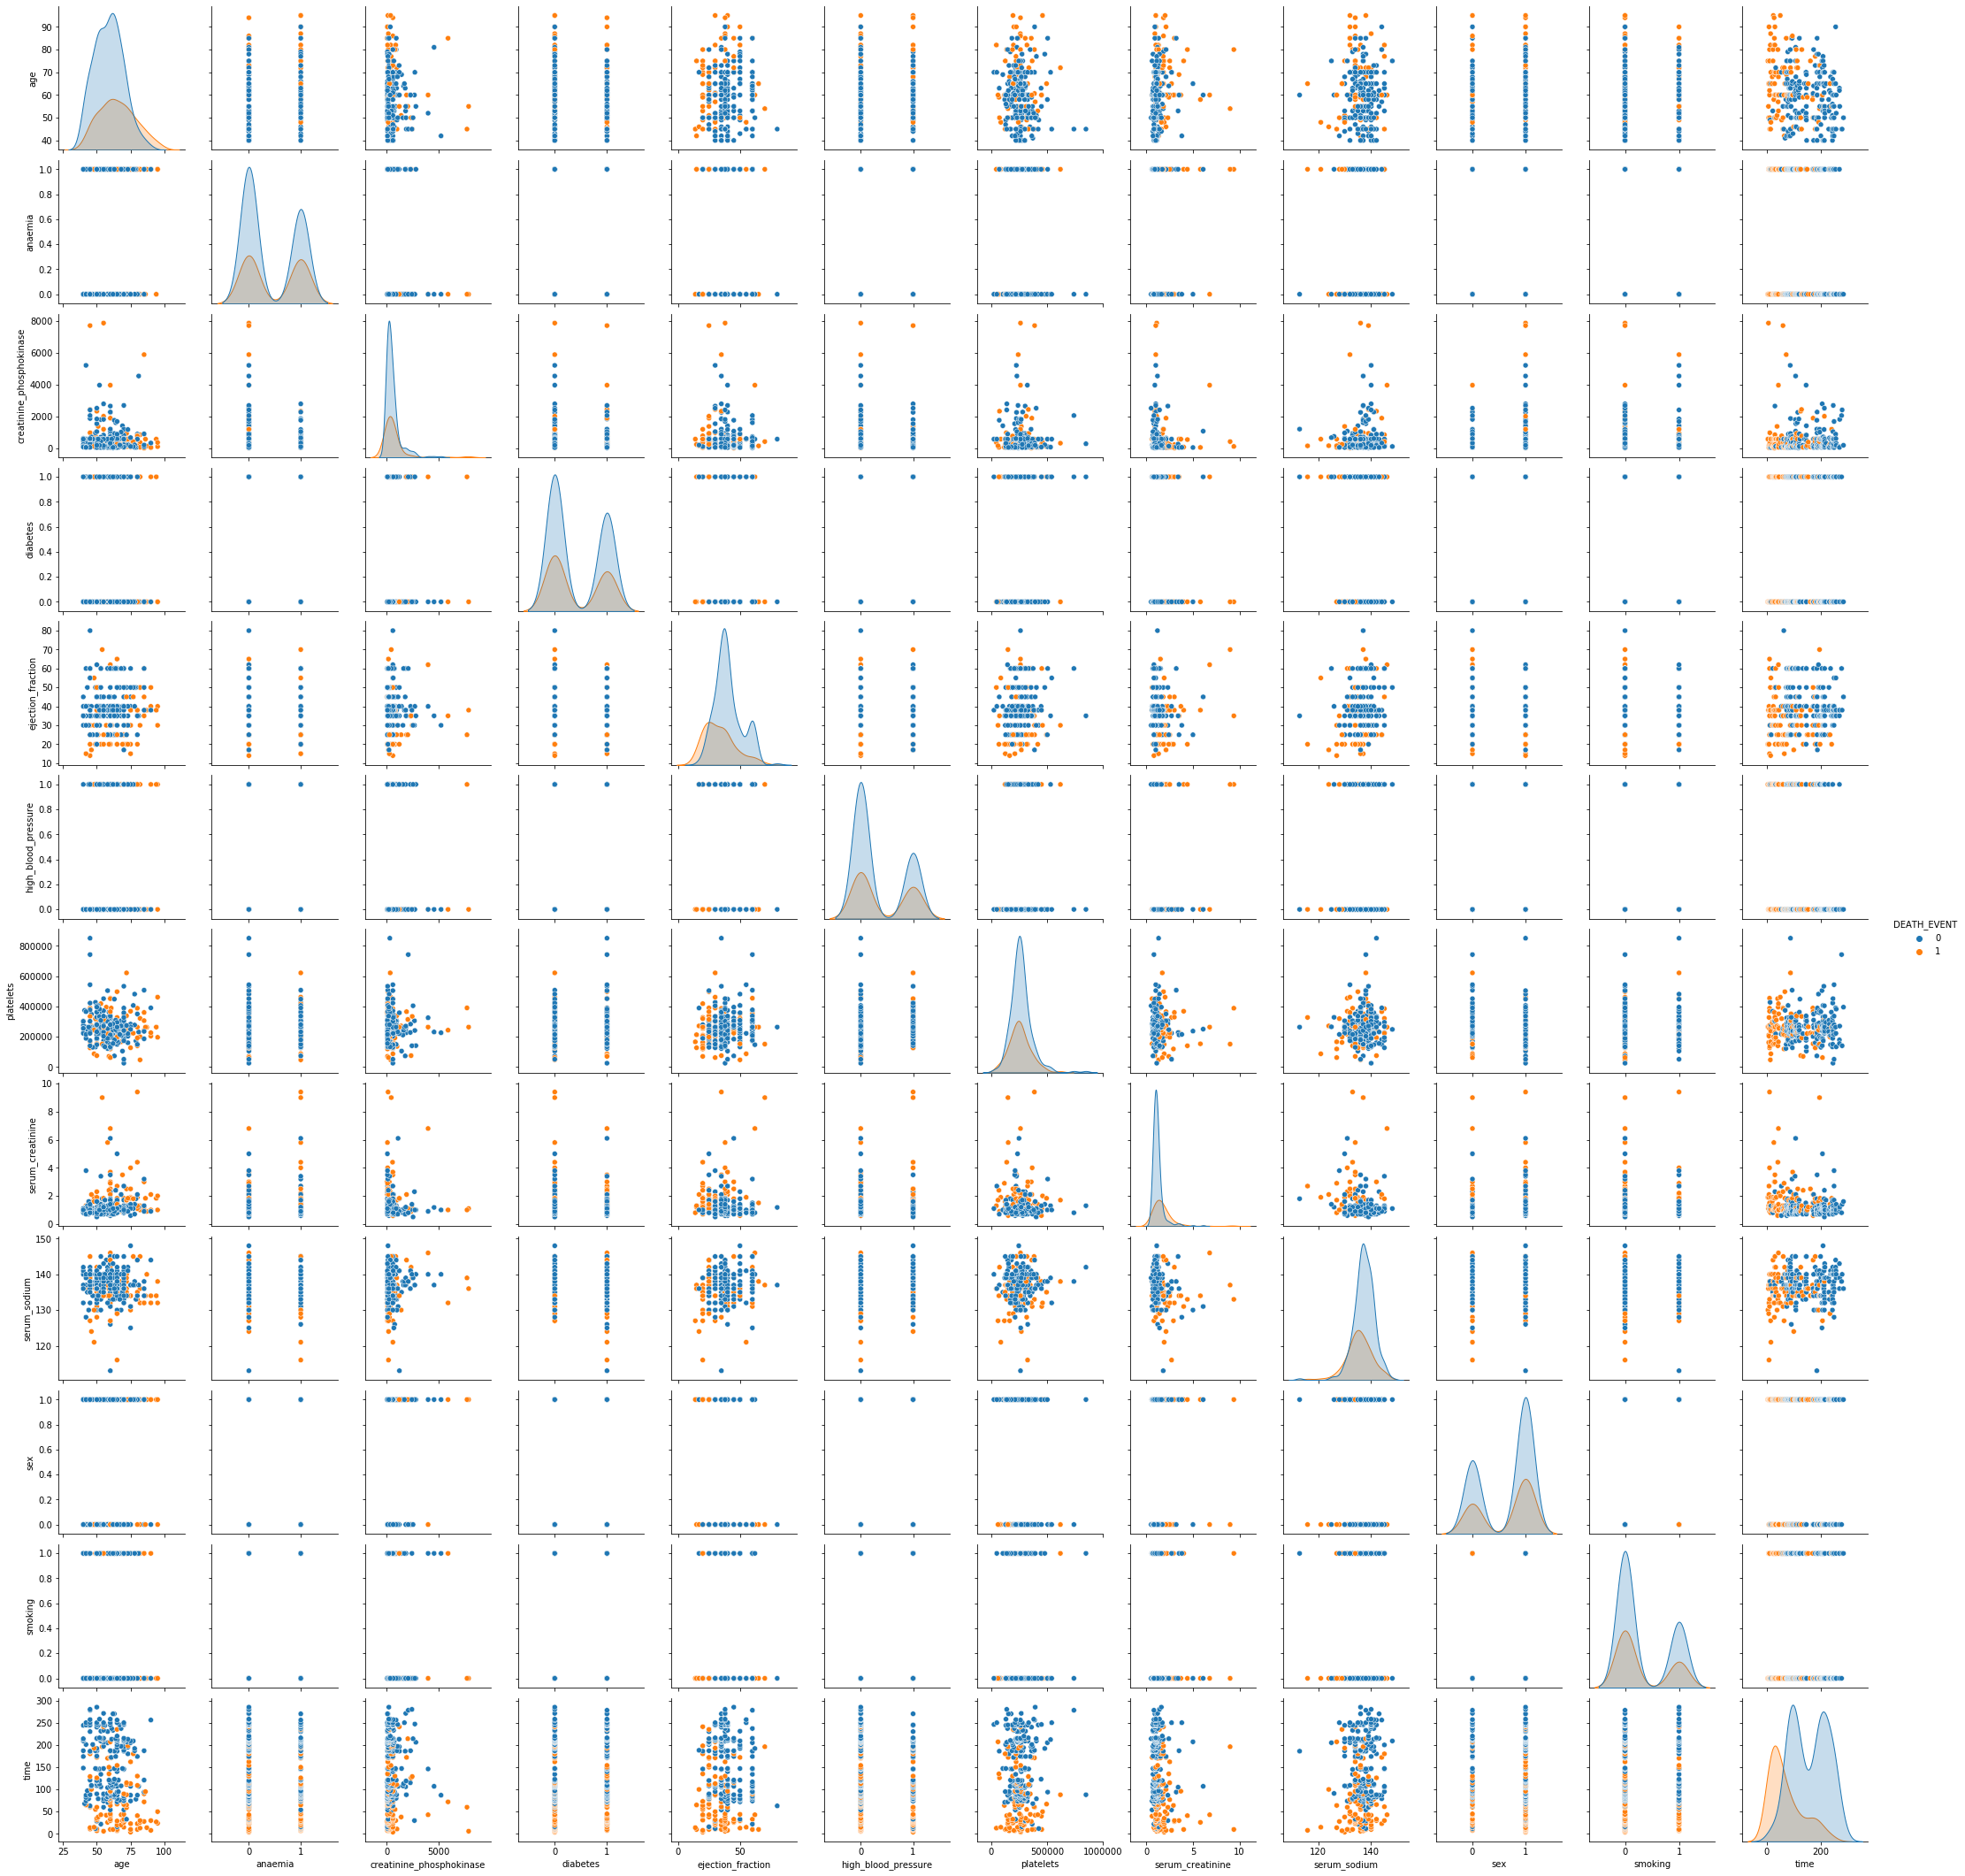

In [9]:
sns.pairplot(dataset, hue = "DEATH_EVENT")
#Save image
plt.savefig(subfolder + "Pairplot.png")

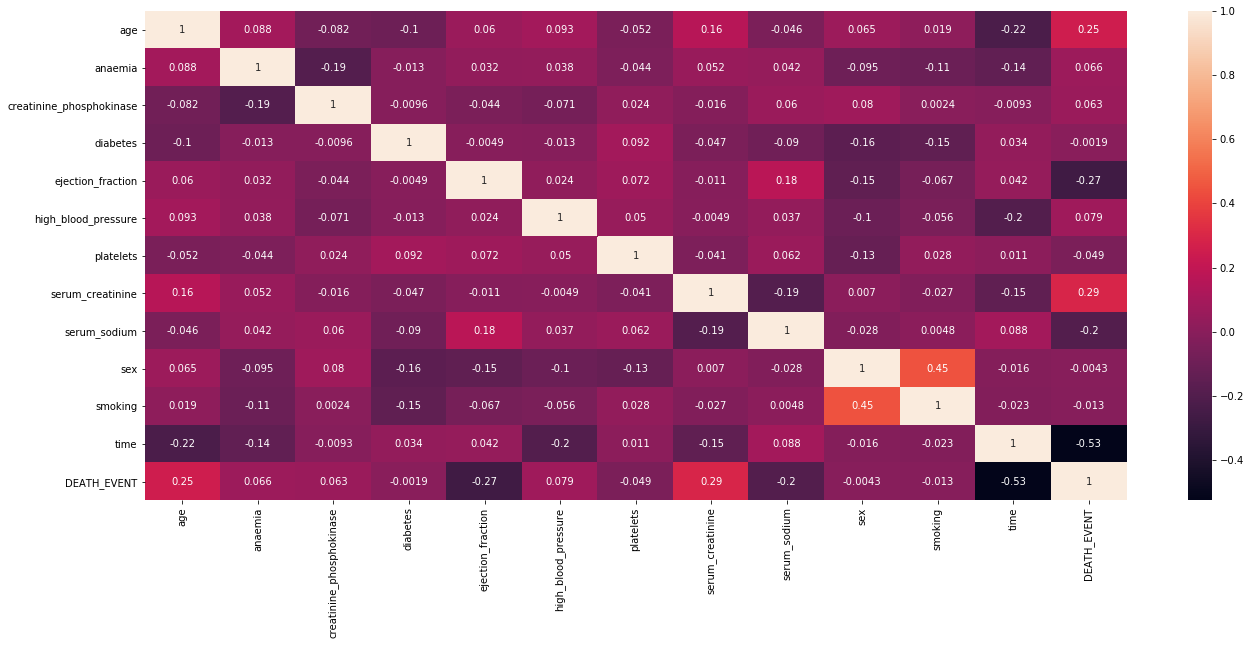

In [10]:
#Correlation heatmap
plt.figure(figsize = (22,9))
sns.heatmap(dataset.corr(method="pearson"),annot=True)

plt.savefig(subfolder + "HeatmapCorrelation.png")

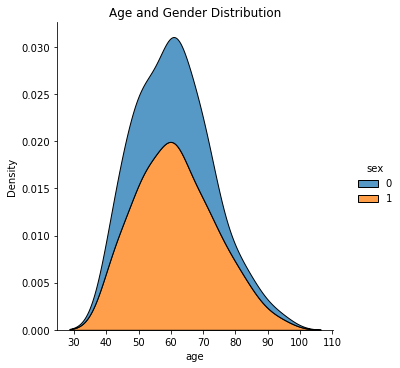

In [11]:
#distribution plot for age and gender
age_density = dataset[{"age","sex"}]

sns.displot(data=age_density, x="age", hue="sex", kind ="kde", multiple ="stack")

title = "Age and Gender Distribution"
plt.title(title)
plt.savefig(subfolder + title + ".png")

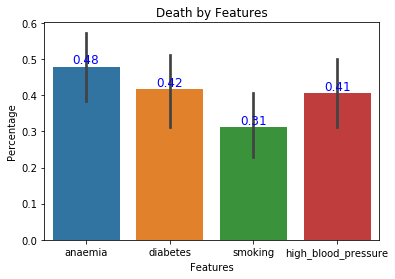

In [91]:
#Number of death based on boolean columns

bool_col = ["anaemia","diabetes","smoking","high_blood_pressure"]
barpltdata = dataset[dataset["DEATH_EVENT"]==1][bool_col]


title = "Death by Features"

chrt = sns.barplot(data= barpltdata)
for p in chrt.patches:
    chrt.annotate("{:.2f}".format(p.get_height()),
                  (p.get_x()+0.4, p.get_height()),
                  ha="center", va="bottom", color="blue", size =12)

chrt.set(xlabel = "Features", ylabel = "Percentage", title = title)
plt.savefig(subfolder + title + ".png")
plt.show()

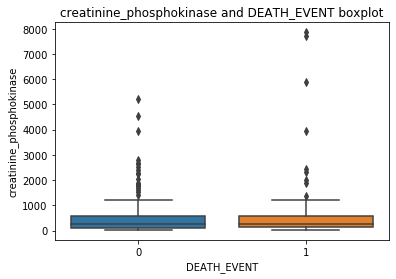

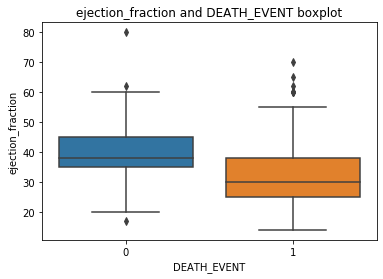

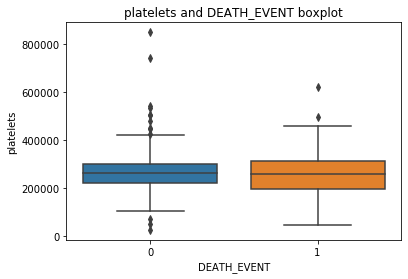

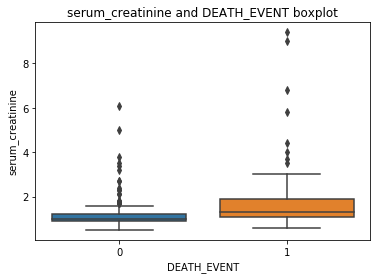

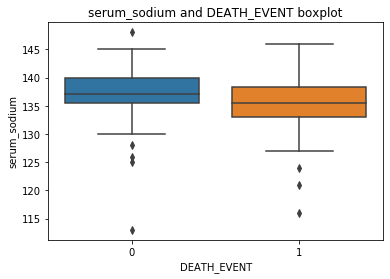

In [13]:
#Create boxplot for the continuous features

bxplt_feature = ["creatinine_phosphokinase",
                 "ejection_fraction",
                 "platelets",
                 "serum_creatinine",
                 "serum_sodium"
                ]

for row, col in enumerate(dataset[bxplt_feature]):
    plt.figure(col)
    title="{} and {} boxplot".format(col,target)
    savename = subfolder + "{}.png".format(title)
    
    sns.boxplot(x= target, y= col, data=dataset)
    plt.xlabel(target)
    plt.ylabel(col)   
    plt.title(title)
    plt.savefig(savename)


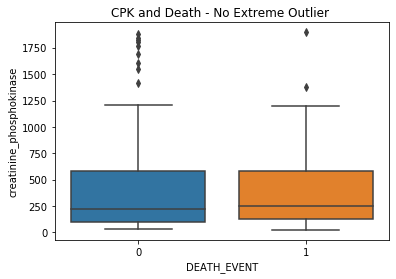

In [14]:
#CPK of the graph has outlier, so we only use any level that less than 2000

cpk = dataset[dataset["creatinine_phosphokinase"]<=2000]
cpk_bxplt = cpk[{"DEATH_EVENT", "creatinine_phosphokinase"}]

title = "CPK and Death - No Extreme Outlier "

plt.title(title)
sns.boxplot(x= target, y= "creatinine_phosphokinase", data=cpk_bxplt)

plt.savefig(subfolder + title +".png")

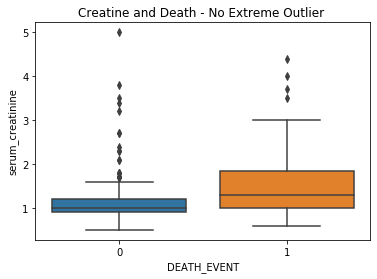

In [15]:
#serum_creatinine also has outlier, get use 5 as a max number

creatine = dataset[dataset["serum_creatinine"]<=5][{"serum_creatinine","DEATH_EVENT"}]
title = "Creatine and Death - No Extreme Outlier "

plt.title(title)
sns.boxplot(x= target, y= "serum_creatinine", data=creatine)

plt.savefig(subfolder + title +".png")

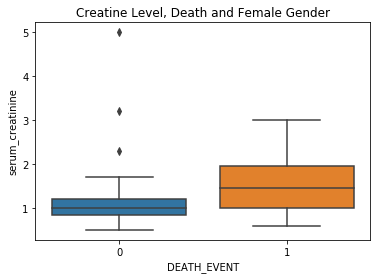

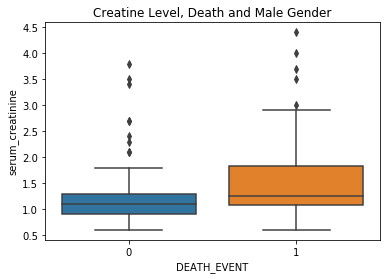

In [16]:
#serum_creatine normal level is diff btw male and female
#Men is 0.74-1.35 mg/dl & Female is 0.59-1.04 mg/dl

creatine_gender = dataset[dataset["serum_creatinine"]<=5][{"serum_creatinine","DEATH_EVENT","sex"}]

for i in range (0,2):
    plt_data = creatine_gender[creatine_gender["sex"]==i]
    plt.figure(i)
    title= "Creatine Level, Death and {} Gender".format("Female" if i==0 else "Male")
    
    plt.title(title)
    sns.boxplot(x=target, y="serum_creatinine", data = plt_data)
    plt.savefig(subfolder + title +".png")


# Train/Test Split

In [68]:
from sklearn.model_selection import train_test_split

y = dataset[target]
X = dataset[features]

#create threshold to determine death_event
threshold = 0.5

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=150,stratify=y)

# ======= Random Forest ML =======

In [69]:
from sklearn import ensemble
clr = ensemble.RandomForestClassifier(n_estimators = 50)
clr.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

# Evaluate RF

In [70]:
from sklearn.metrics import accuracy_score

actual = y_test
#predit value based on X_test
predicted= clr.predict(X_test)

#Put into DF for evaluate
evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": predicted  
})


In [71]:
evaluate["death_predict"] = (evaluate["predicted"] > threshold)*1

#print((evaluate["actual"] == evaluate["death_predict"]).mean())
print (accuracy_score(y_test,predicted))
evaluate

0.7111111111111111


,actual,predicted,death_predict
217,1,1,1
219,0,0,0
88,0,0,0
213,1,0,0
77,0,0,0
...,...,...,...
139,0,0,0
295,0,0,0
68,1,0,0
195,1,0,0


# Confusion Matrix RF

In [72]:
pd.crosstab(
    evaluate["actual"],
    evaluate["death_predict"],
    rownames=["Actual"],
    colnames= ["Prediction"],
    margins = True
)

Prediction,0,1,All
Actual,,,
0,53,8,61
1,18,11,29
All,71,19,90


# ======= Logistic Regression ML =======

In [73]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression().fit(X_train, y_train)

actual = y_test
predicted= clr.predict(X_test)

evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": predicted    
})
evaluate["death_predict"] = (evaluate["predicted"] > threshold)*1

print (accuracy_score(y_test,predicted))

pd.crosstab(
    evaluate["actual"],
    evaluate["death_predict"],
    rownames=["Actual"],
    colnames= ["Prediction"],
    margins = True
)

0.7777777777777778


Prediction,0,1,All
Actual,,,
0,59,2,61
1,18,11,29
All,77,13,90


# ======= SVC ML =======

In [74]:
from sklearn import svm
clr = svm.SVC()
clr.fit(X_train, y_train)

actual = y_test
predicted = clr.predict(X_test)

evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": predicted    
})
evaluate["death_predict"] = (evaluate["predicted"] > threshold)*1

print (accuracy_score(y_test,predicted))

pd.crosstab(
    evaluate["actual"],
    evaluate["death_predict"],
    rownames=["Actual"],
    colnames= ["Prediction"],
    margins = True
)

0.6777777777777778


Prediction,0,All
Actual,,
0,61,61
1,29,29
All,90,90


# ======= KNeighbor Classifier =======

In [75]:
from sklearn.neighbors import KNeighborsClassifier
clr = KNeighborsClassifier(n_neighbors =3)
clr.fit(X_train, y_train)

actual = y_test
predicted = clr.predict(X_test)

evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": predicted    
})
evaluate["death_predict"] = (evaluate["predicted"] > threshold)*1

print (accuracy_score(y_test,predicted))

pd.crosstab(
    evaluate["actual"],
    evaluate["death_predict"],
    rownames=["Actual"],
    colnames= ["Prediction"],
    margins = True
)

0.5222222222222223


Prediction,0,1,All
Actual,,,
0,42,19,61
1,24,5,29
All,66,24,90


# ======= Tensorflow DL =======

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [84]:
input_shape = X.shape[1]
model = keras.Sequential(
    [
        keras.Input(shape= input_shape),
        layers.Dense(6, activation ="relu"),
        layers.Dense(8, activation ="relu"),
        layers.Dense(8, activation ="relu"),
        layers.Dense(64, activation ="relu"),
        layers.Dense(10, activation ="softmax")
    ]
)

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 1,426
Trainable params: 1,426
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss="sparse_categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

In [87]:
#batch_size = 128
epochs = 500

model.fit(X_train, y_train,  epochs=epochs)#,batch_size=batch_size)

Epoch 1/500
209/209 [==============================] - 0s 460us/sample - loss: 54504.6891 - acc: 0.0000e+00
Epoch 2/500
209/209 [==============================] - 0s 44us/sample - loss: 30411.8928 - acc: 0.0000e+00
Epoch 3/500
209/209 [==============================] - 0s 49us/sample - loss: 13085.9307 - acc: 0.1818
Epoch 4/500
209/209 [==============================] - 0s 45us/sample - loss: 8047.3835 - acc: 0.6794
Epoch 5/500
209/209 [==============================] - 0s 52us/sample - loss: 4862.4916 - acc: 0.6794
Epoch 6/500
209/209 [==============================] - 0s 31us/sample - loss: 1425.1077 - acc: 0.5311
Epoch 7/500
209/209 [==============================] - 0s 37us/sample - loss: 1601.6151 - acc: 0.4402
Epoch 8/500
209/209 [==============================] - ETA: 0s - loss: 1564.2378 - acc: 0.62 - 0s 48us/sample - loss: 1335.5814 - acc: 0.6794
Epoch 9/500
209/209 [==============================] - 0s 33us/sample - loss: 636.0761 - acc: 0.4641
Epoch 10/500
209/209 [=========

209/209 [==============================] - 0s 39us/sample - loss: 77.8401 - acc: 0.4833
Epoch 160/500
209/209 [==============================] - 0s 35us/sample - loss: 310.0711 - acc: 0.6794
Epoch 161/500
209/209 [==============================] - 0s 68us/sample - loss: 320.6029 - acc: 0.4593
Epoch 162/500
209/209 [==============================] - 0s 39us/sample - loss: 132.8106 - acc: 0.5072
Epoch 163/500
209/209 [==============================] - 0s 33us/sample - loss: 63.5380 - acc: 0.5263
Epoch 164/500
209/209 [==============================] - 0s 58us/sample - loss: 184.8975 - acc: 0.5263
Epoch 165/500
209/209 [==============================] - 0s 39us/sample - loss: 55.3931 - acc: 0.5646
Epoch 166/500
209/209 [==============================] - 0s 33us/sample - loss: 99.3095 - acc: 0.6411
Epoch 167/500
209/209 [==============================] - 0s 59us/sample - loss: 242.6233 - acc: 0.5167
Epoch 168/500
209/209 [==============================] - 0s 42us/sample - loss: 311.3725 - 

209/209 [==============================] - 0s 54us/sample - loss: 212.8532 - acc: 0.5263
Epoch 318/500
209/209 [==============================] - 0s 44us/sample - loss: 215.8569 - acc: 0.4498
Epoch 319/500
209/209 [==============================] - 0s 38us/sample - loss: 269.4106 - acc: 0.6555
Epoch 320/500
209/209 [==============================] - 0s 51us/sample - loss: 60.3565 - acc: 0.5263
Epoch 321/500
209/209 [==============================] - 0s 38us/sample - loss: 190.3954 - acc: 0.5311
Epoch 322/500
209/209 [==============================] - 0s 34us/sample - loss: 280.3373 - acc: 0.6794
Epoch 323/500
209/209 [==============================] - 0s 60us/sample - loss: 139.5351 - acc: 0.5455
Epoch 324/500
209/209 [==============================] - 0s 35us/sample - loss: 97.4772 - acc: 0.5646
Epoch 325/500
209/209 [==============================] - 0s 32us/sample - loss: 183.9730 - acc: 0.5550
Epoch 326/500
209/209 [==============================] - 0s 61us/sample - loss: 51.6043 -

209/209 [==============================] - 0s 34us/sample - loss: 263.4481 - acc: 0.4976
Epoch 476/500
209/209 [==============================] - 0s 33us/sample - loss: 273.7243 - acc: 0.6555
Epoch 477/500
209/209 [==============================] - 0s 48us/sample - loss: 290.0482 - acc: 0.5263
Epoch 478/500
209/209 [==============================] - 0s 38us/sample - loss: 258.7270 - acc: 0.5311
Epoch 479/500
209/209 [==============================] - 0s 36us/sample - loss: 94.9419 - acc: 0.6507
Epoch 480/500
209/209 [==============================] - 0s 34us/sample - loss: 195.2576 - acc: 0.5550
Epoch 481/500
209/209 [==============================] - 0s 45us/sample - loss: 156.4912 - acc: 0.5167
Epoch 482/500
209/209 [==============================] - 0s 39us/sample - loss: 112.1366 - acc: 0.5359
Epoch 483/500
209/209 [==============================] - 0s 29us/sample - loss: 69.6938 - acc: 0.6220
Epoch 484/500
209/209 [==============================] - 0s 55us/sample - loss: 75.0782 -

In [88]:
predicted = model.predict(X_test)

In [89]:
value_pred = []
for i in range(len(predicted)):
  if i >= threshold:
    value_pred.append(1)
  else:
    value_pred.append(0)

In [90]:
score = model.evaluate(X_test, y_test)
print (score)

evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": value_pred
})

pd.crosstab(
    evaluate["actual"],
    evaluate["predicted"],
    rownames=["Actual"],
    colnames= ["Prediction"],
    margins = True
)

90/90 [==============================] - 0s 457us/sample - loss: 60.4410 - acc: 0.6778
[60.440956030951604, 0.67777777]


Prediction,0,1,All
Actual,,,
0,0,61,61
1,1,28,29
All,1,89,90
